variance is: 4.0
expectation is: 4.0


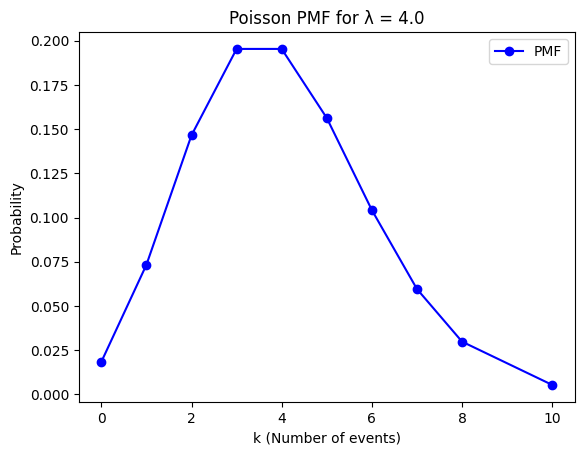

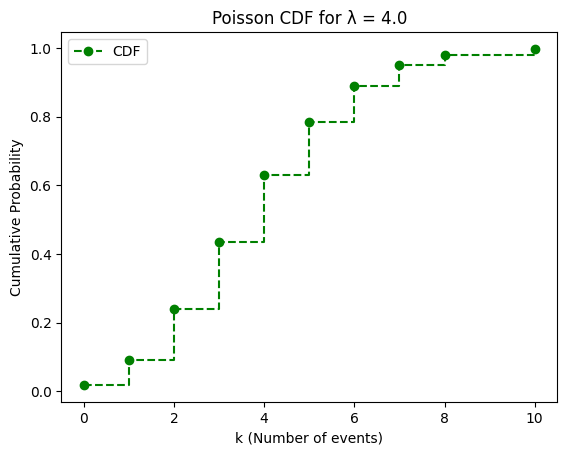

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math

#generate poisson random_variables
def generate_poisson(lambda_val, size):
    poisson_values = np.random.poisson(lambda_val, size)
    return poisson_values

#calculate pmf
def poisson_pmf(k, lambda_val):  
    return (lambda_val**k * math.exp(-lambda_val)) / math.factorial(k)

#calculate cdf
def poisson_cdf(k, lambda_val):
    cdf = 0.0
    for i in range(k + 1):
        cdf += poisson_pmf(i, lambda_val)
    return cdf

#Calculate the expectation using the mathematical formula
def poisson_expectation(lambda_param):
    return lambda_param

#Calculate the variance using the mathematical formula
def poisson_variance(lambda_param):
    return lambda_param


#plot pmf
def plot_poisson_pmf(lambda_val, size):
    pmf_values = [poisson_pmf(k, lambda_val) for k in unique_values]

    plt.plot(unique_values, pmf_values, marker='o', linestyle='-', color='blue', label='PMF')

    plt.title(f'Poisson PMF for λ = {lambda_val}')
    plt.xlabel('k (Number of events)')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

#plot cdf
def plot_poisson_cdf(lambda_val, size):
    cdf_values = [poisson_cdf(k, lambda_val) for k in unique_values]

    plt.step(unique_values, cdf_values, where='post', color='green', linestyle='--', marker='o', label='CDF')
    plt.title(f'Poisson CDF for λ = {lambda_val}')
    plt.xlabel('k (Number of events)')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.show()

#set lambda parameter
lambda_val = 4.0

#set size of random variables
size = 100

#store poisson random variables 
poisson_values = generate_poisson(lambda_val, size)

#create array of unique values of poisson random variables
unique_values = np.unique(poisson_values)

#print expectation and mean
print("variance is:", poisson_variance(lambda_val))
print("expectation is:", poisson_expectation(lambda_val))

#show results
plot_poisson_pmf(lambda_val, size)
plot_poisson_cdf(lambda_val, size)
